In [25]:
import numpy as np # For numerical operations and array handling
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations
import seaborn as sns # For making statistical graphics

In [26]:
import os
# Traverse the directory tree rooted at '/kaggle/input'
# os.walk() yields a tuple of (dirpath, dirnames, filenames) for each directory in the tree
for dirpath, dirnames, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
 # Construct full file path and print it
  print(os.path.join(dirpath, filename))

In [27]:
# Load the Google stock price training dataset into a pandas DataFrame
# Ensure that the CSV file is located at the specified path in your Google Drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Test.csv")

In [28]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [30]:
# Display a concise summary of the DataFrame to understand its structure
data.info()
data.head()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [31]:
# Check for missing values in each column of the DataFrame
# This helps in understanding the completeness of the dataset
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [32]:
# Generate descriptive statistics to understand the distribution and central tendencies of the dataset
data.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [33]:
# Clean and Convert Numeric Columns
# Iterate over specific columns to remove commas and convert to float
for column in ['Open', 'High', 'Low', 'Close', 'Volume']: # Add other numeric columns as needed
 # Check if the column type is object (string) before applying str.replace
 if data[column].dtype == object:
  data[column] = data[column].str.replace(',', '').astype(float)
# Select Only Numeric Columns
# Filter the DataFrame to include only numeric columns
numeric_data = data.select_dtypes(include=np.number)
# Compute Correlation Matrix
# Calculate the pairwise correlation of numeric columns, excluding NA/null values
correlation_matrix = numeric_data.corr()
# Display Correlation Matrix
# Print or visualize the correlation matrix as needed
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.960636  0.972508  0.907690  0.502175
High    0.960636  1.000000  0.946877  0.947077  0.539165
Low     0.972508  0.946877  1.000000  0.951060  0.332733
Close   0.907690  0.947077  0.951060  1.000000  0.345362
Volume  0.502175  0.539165  0.332733  0.345362  1.000000


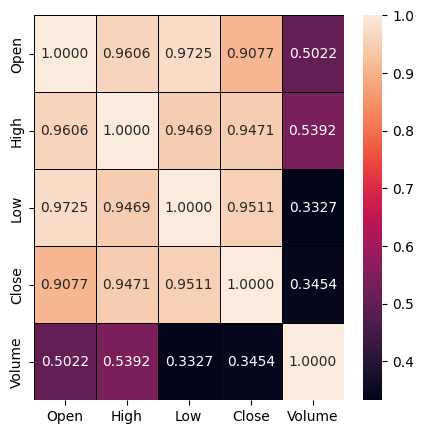

In [34]:
# Create a figure and axis for the heatmap
f, ax = plt.subplots(figsize=(5, 5))
# Drop the 'Date' column to focus on numerical data for correlation analysis
# Generate and display the correlation matrix using Seaborn's heatmap function
sns.heatmap(
 data.drop(columns=['Date']).corr(), # Compute correlation matrix
 annot=True, # Annotate each cell with the numeric value
 linewidths=0.5, # Set width of lines that divide cells
 linecolor="black", # Set color of lines dividing cells
 fmt=".4f", # Format annotations to 4 decimal places
 ax=ax # Specify the axis to plot on
)
# Display the heatmap
plt.show()


In [35]:
# Retrieve and display the column names of the DataFrame
print("Dataset Columns:")
print(data.columns)

Dataset Columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [36]:
# Extract the 'Open' column values and convert them into a NumPy array
# This array will be used as input features for the model
data_set = data.loc[:, ["Open"]].values

In [37]:
train=data_set[:len(data_set)-50]
test=data_set[len(train):]
train.reshape(train.shape[0],1)
train.shape

(0, 1)

In [38]:
# Determine the size of the training set (e.g., 80% of the data)
train_size = int(len(data_set) * 0.8)
# Split the dataset into training and testing sets
train = data_set[:train_size]
test = data_set[train_size:]


In [39]:
# Reshape the training data to match LSTM input requirements
# LSTM expects input in the form of [samples, time steps, features]
train = train.reshape((train.shape[0], 1))

In [40]:
# Import the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler with the desired feature range
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit the scaler on the training data and transform it
train_scaled = scaler.fit_transform(train)

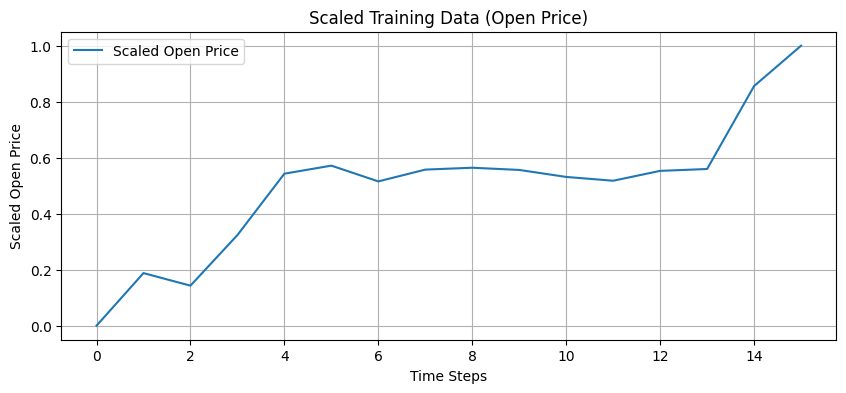

In [41]:
# Plot the scaled training data to visualize the normalized 'Open' prices
plt.figure(figsize=(10, 4)) # Set the figure size for better readability
plt.plot(train_scaled, label='Scaled Open Price')
plt.title('Scaled Training Data (Open Price)')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Open Price')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Initialize lists to hold input sequences (X) and corresponding targets (Y)
X_train = []
Y_train = []
# Define the number of time steps (sequence length)
timesteps = 10 # Adjust as needed, ensuring it's less than len(train_scaled)
# Loop to create sequences and corresponding targets
for i in range(timesteps, len(train_scaled)):
 X_train.append(train_scaled[i - timesteps:i, 0]) # Sequence of 'timesteps' length
 Y_train.append(train_scaled[i, 0]) # Target value following the sequence
# Convert lists to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
# Reshape X_train to be 3D as required for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Display the shape of the training data
X_train.shape
X_train
# Understand the Role of y_train in Supervised Learning
Y_train

array([0.53139146, 0.51781145, 0.55304074, 0.55973234, 0.85593387,
       1.        ])

In [44]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
# Initialize the RNN model
regressor = Sequential()
# Add the first RNN layer with 50 units, 'tanh' activation, and dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,
input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Add the second RNN layer with 50 units and dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
# Add the third RNN layer with 50 units and dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
# Add the fourth RNN layer with 50 units and dropout regularization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))
# Add the output layer with a single unit
regressor.add(Dense(units=1))
# Compile the RNN model using the Adam optimizer and mean squared error loss function
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Train the RNN model on the training data for 100 epochs with a batch size of 32
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 2.4325
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2832
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3488
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4519
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2408
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2787
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3333
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6789
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1680
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7247
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5493
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8297
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1635
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4004
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2577
Epoch 16/100
1/1 ━━━━

In [45]:
# Extract the last 'timesteps' number of records from the original dataset
inputs = data_set[len(data_set) - len(test) - timesteps:]
# Apply the same scaling transformation used on the training data
inputs = scaler.transform(inputs)

In [46]:
# Initialize a list to hold the test sequences
X_test = []
# Create sequences of 'timesteps' length from the input data
for i in range(timesteps, inputs.shape[0]):
 X_test.append(inputs[i - timesteps:i, 0])
# Convert the list to a NumPy array
X_test_rnn = np.array(X_test)
# Reshape the data to match the RNN input shape: (samples, timesteps, features)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
# Use the trained RNN model to make predictions on the test data
predicted_stock_price = regressor.predict(X_test_rnn)
# Inverse transform the predicted values to their original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


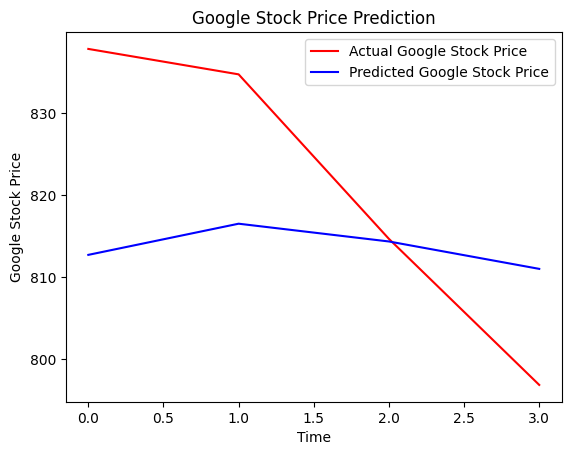

In [47]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Plot the actual stock prices in red
plt.plot(test, color='red', label='Actual Google Stock Price')
# Plot the predicted stock prices in blue
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
# Add title and labels to the plot
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
# Display the legend
plt.legend()
# Show the plot
plt.show()


In [48]:
# Reshape X_train to match the RNN input shape: (samples, timesteps, features)
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [49]:
# Import mathematical functions
import math
# Import Keras modules for building the model
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Import scikit-learn modules for data preprocessing and evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [50]:
# Initialize the LSTM model
model = Sequential()
# Add an LSTM layer with 10 units; input_shape is (timesteps, features)
model.add(LSTM(10, input_shape=(1, timesteps)))
# Add a Dense output layer with 1 unit for regression output
model.add(Dense(1))
# Compile the model using mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the model on the training data
model.fit(trainX, Y_train, epochs=50, batch_size=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4327 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4284 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2883 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2160 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2974 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1501 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1171 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1273 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1338 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

In [52]:
# Convert the test sequences into a NumPy array
testX = np.array(X_test)
# Reshape test data to match LSTM input shape: (samples, timesteps, features)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
# Generate predictions using the trained LSTM model
predict_lstm = model.predict(testX)
# Inverse transform the predictions to return them to their original scale
predict_lstm = scaler.inverse_transform(predict_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


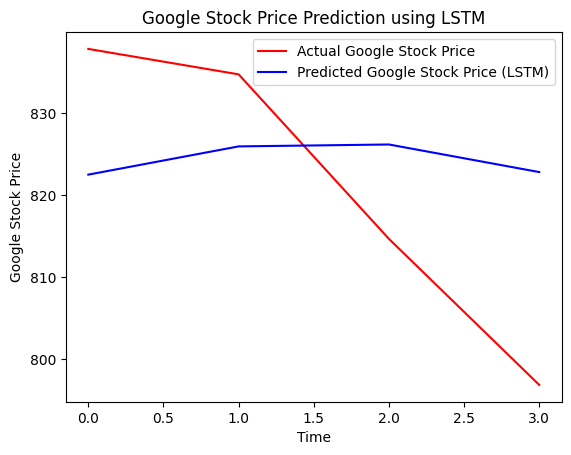

In [53]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Plot the actual stock prices in red
plt.plot(test, color='red', label='Actual Google Stock Price')
# Plot the predicted stock prices from the LSTM model in blue
plt.plot(predict_lstm, color='blue', label='Predicted Google Stock Price (LSTM)')
# Add title and labels to the plot
plt.title('Google Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
# Display the legend
plt.legend()
# Show the plot
plt.show()